In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
iris1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
iris1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris1['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [4]:
X=iris1.drop('target',axis=1)
t=iris1['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=3
iris_data=pca.fit_transform(X)

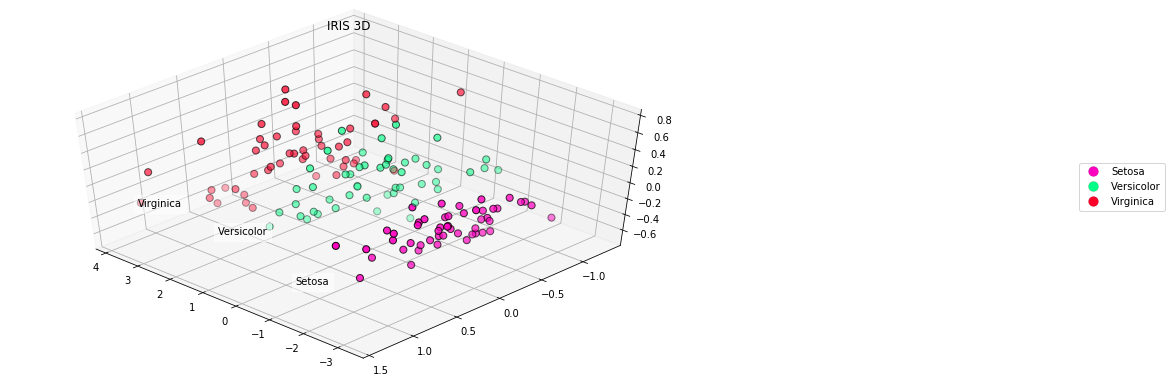

In [17]:
from matplotlib.lines import Line2D
fig = plt.figure(1, figsize=(10, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


labelTups = [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]
for name, label in labelTups:
    ax.text3D(iris_data[t == label, 0].mean(),
              iris_data[t == label, 1].mean() + 1.5,
              iris_data[t == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(iris_data[:,0],iris_data[:,1],iris_data[:,2],c=t,cmap='gist_rainbow_r', edgecolor='k', s=50,)
ax.set_title("IRIS 3D")
    
colors = [plt.cm.gist_rainbow_r(np.float(i/2)) for i in [0,1, 2]]
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], loc='right', bbox_to_anchor=(1.7, .5))

plt.show(block = False)